# Lab05 Python Data Science with Pandas

## Please submit your finished lab05 jupyter notebook via pull request in GitHub

In [2]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [3]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [4]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df[['city', 'country']]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [10]:
# Q2: how to get the first 5 rows of the "city" column?
df['city'][:5]
df['city'].head(5)

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

### Using .loc[ ]

In [12]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[2]

lat               51.478199
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [16]:
# Q4: how to use .loc to select the first row in "country" column?
df['country'].loc[0]

KeyError: 'country'

In [17]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df[['city', 'date']].loc[:3]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


### Using .iloc[ ]

In [23]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[3].iloc[2]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom
...,...,...,...,...,...
1754,48.356013,11.791710,07/09/2014 13:13,Munich,Germany
1755,48.356529,11.792183,07/09/2014 13:14,Munich,Germany
1756,48.356285,11.791710,07/09/2014 13:17,Munich,Germany
1757,48.355328,11.791710,07/09/2014 13:18,Munich,Germany


In [24]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[::300]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


## Part 2 <br /> How to select rows by some value(s)

In [58]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [26]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df['city'] == 'Munich'

0       False
1       False
2       False
3       False
4       False
        ...  
1754     True
1755     True
1756     True
1757     True
1758     True
Name: city, Length: 1759, dtype: bool

In [30]:
# Q11: select rows where either the city is munich, or the country is serbia
df[(df['city'] == 'Munich') | (df['country'] == 'Serbia')]

,lat,lon,date,city,country
1362,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
1363,44.814263,20.463396,06/21/2014 02:29,Belgrade,Serbia
1364,44.814237,20.463395,06/21/2014 04:29,Belgrade,Serbia
1365,44.814260,20.463441,06/21/2014 05:30,Belgrade,Serbia
1366,44.814255,20.463413,06/21/2014 08:00,Belgrade,Serbia
1367,44.814763,20.462994,06/21/2014 10:14,Belgrade,Serbia
1368,44.814257,20.463436,06/21/2014 13:29,Belgrade,Serbia
1369,44.814246,20.463423,06/21/2014 13:45,Belgrade,Serbia
1370,44.814242,20.463396,06/21/2014 15:29,Belgrade,Serbia
1371,44.817690,20.464091,06/21/2014 17:29,Belgrade,Serbia


In [31]:
# Q12: how many observations are west of the prime meridian?
len(df[df['lon'] < 0])

263

In [34]:
# Q13: get all rows that contain a city that starts with the letter G
df[df['city'].str.startswith('G')]

,lat,lon,date,city,country
659,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
660,50.273632,18.729429,06/02/2014 06:55,Gliwice,Poland
942,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
943,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
1575,40.187827,20.079304,07/04/2014 17:39,Gjirokastër,Albania
1576,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [41]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe
len(df['city'].unique()), len(df['country'].unique()), df.isnull().values.any()

(113, 15, False)

In [44]:
# Q15: group by country name and show the city names in each of the country
df.groupby('country')['city'].unique()

country
Albania                                                [Berat, Gjirokastër]
Bosnia and Herzegovina       [Sarajevo, Mostar, Herzegovina-Neretva Canton]
Croatia                                           [Ploče, Split, Dubrovnik]
Czech Republic            [Novy Bohumin, Ostrava, Suchdol nad Odrou, Hra...
Germany                   [Kümmersbruck, Winkelhaid, Kammerstein, Ansbac...
Greece                    [Kakavia, Dytiki Ellada, Peloponnese, Athens, ...
Kosovo                                                            [Prizren]
Macedonia (FYROM)                                                   [Ohrid]
Montenegro                                                          [Kotor]
Poland                    [Zendek, Tarnowskie Góry County, Silesian Voiv...
Portugal                  [Lisbon, Amadora, Algueirão-Mem Martins, Sintr...
Serbia                                                [Belgrade, Slepčević]
Spain                     [El Prat de Llobregat, Viladecans, Barcelona, ...
Turk

## Part 3 <br /> How to select based on a date-time values

In [45]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [62]:
# Q16: is the timestamp index unique? How can you use code to find it?
len(dt) == len(dt.index.unique())

True

In [61]:
# Q17: drop duplicate index
dt.drop(index=dt[dt.index.duplicated()].index, axis=0, inplace=True)

In [106]:
# Q18: create a weekday and a weekend dataframe
dt['weekday'] = [day.strftime("%A") for day in dt.index]
weekday = dt[dt.index.weekday.isin(range(5))]
weekend = dt[dt.index.weekday.isin([5,6])]

<AxesSubplot:>

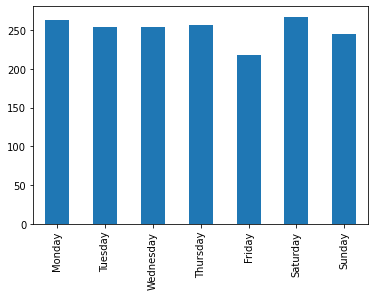

In [109]:
# Q19: calculate and plot the number of observations each day of the week has
dt.weekday.value_counts().loc[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]].plot.bar()